**Resources ** <br>
https://arxiv.org/pdf/2410.20238 <br>
https://huggingface.co/rahbi/alclam-base-v1/tree/main <br>
https://github.com/Curated-Awesome-Lists/awesome-arabic-nlp <br>
https://data.mendeley.com/datasets/86x733xkb8/2 <br>
https://www.sciencedirect.com/science/article/pii/S2352340923009472#bib0001 <br>
https://huggingface.co/UBC-NLP/MARBERT

In [ ]:
!pip install transformers datasets torch pandas scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:

path = '/content/drive/MyDrive/Colab/AR/'


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel(f'{path}Augmented_SpamHamTweets.xlsx')  # Use f-string for formatting


# Display the first few rows
print(df.head())

                                          Tweet Text  \
0  عسكريون إسرائيليون متقاعدون يطالبون بايدن بعدم...   
1  دراسة دولية زيادة أعداد الأشخاص الراغبين في تل...   
2  مصادر عسكرية القوات السودانية تقترب من منطقة ب...   
3  المحل العسكري والاستراتيجي حنفي عبداله السودان...   
4  تخط منغوليا الداخلية لإغلاق جميع عمليات تعدين ...   

                                        Cleaned Text Label  \
0  عسكريون اسرائيليون متقاعدون يطالبون بايدن بعدم...   Ham   
1  دراسه دوليه زياده اعداد الاشخاص الراغبين في تل...   Ham   
2  مصادر عسكريه القوات السودانيه تقترب من منطقه ب...   Ham   
3  المحل العسكري والاستراتيجي حنفي عبداله السودان...   Ham   
4  تخط منغوليا الداخليه لاغلاق جميع عمليات تعدين ...   Ham   

                  Date      Time                       Date Time  
0  2021-03-02 00:00:00  10:38:56  Tue Mar 02 10:38:56 +0000 2021  
1  2021-03-02 00:00:00  10:28:53  Tue Mar 02 10:28:53 +0000 2021  
2  2021-03-02 00:00:00  10:24:15  Tue Mar 02 10:24:15 +0000 2021  
3  2021-03-02 00:00:00

visualize the distribution of the labels

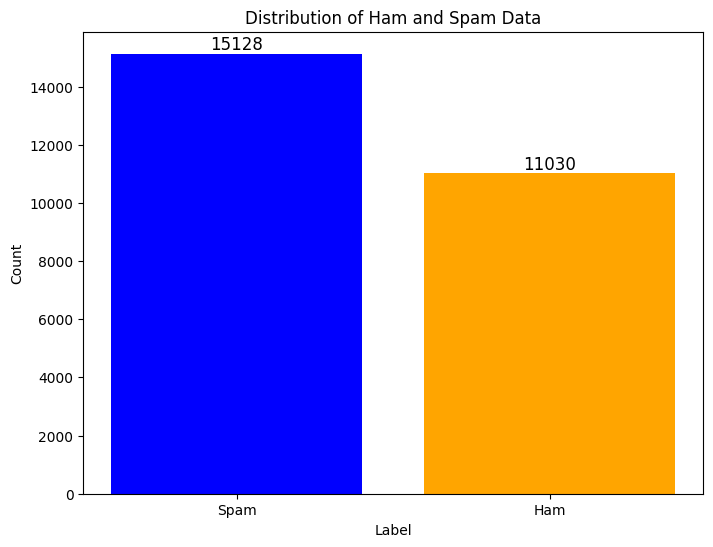

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = df['Label'].value_counts()

# Plot the chart
plt.figure(figsize=(8, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])

# Annotate each bar with its count
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate (center of the bar)
        height,  # y-coordinate (top of the bar)
        f'{height}',  # Text to display
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=12  # Font size
    )

# Add labels and title
plt.title('Distribution of Ham and Spam Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='', alpha=0.7)

# Show the chart
plt.show()


Convert labels to numerical format and split the data into training and validation sets:


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "UBC-NLP/MARBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, from_tf=True, num_labels=2)  # Binary classification



def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/376 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/652M [00:00<?, ?B/s]

All TF 2.0 model weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


In [ ]:
import torch
from torch.utils.data import Dataset

class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)




In [ ]:
# Map labels to numerical values
label_mapping = {'Ham': 0, 'Spam': 1}
df['label'] = df['Label'].map(label_mapping)


In [ ]:

from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from transformers import Trainer, TrainingArguments
import numpy as np


texts = np.array(df['Tweet Text'])  # Array of text samples
labels = np.array(df['label'])  # Array of corresponding labels

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics for each class and fold
num_labels = len(set(labels))  # Number of unique labels
all_metrics = {i: [] for i in range(num_labels)}
confusion_matrices = []  # Store confusion matrices for each fold


# Cross-validation loop
for fold, (train_index, val_index) in enumerate(kf.split(texts)):
    print(f"Starting Fold {fold + 1}...")

    # Split the data
    train_texts, val_texts, train_labels, val_labels = train_test_split(
        df['Tweet Text'], df['label'], test_size=0.2, random_state=42
    )
    # Prepare datasets
    train_texts = train_texts.tolist()
    val_texts = val_texts.tolist()
    train_labels = train_labels.tolist()
    val_labels = val_labels.tolist()

    train_encodings = tokenizer(train_texts, truncation=True, padding=True)
    val_encodings = tokenizer(val_texts, truncation=True, padding=True)

    train_dataset = TweetDataset(train_encodings, train_labels)
    val_dataset = TweetDataset(val_encodings, val_labels)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=f'{path}results',
        eval_strategy='epoch',
        save_strategy='epoch',
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir=f'{path}logs',
        logging_steps=100,
        learning_rate=2e-5,
        fp16=True  # Mixed precision training
    )

    # Define Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer
    )

    # Train the model
    trainer.train()

     # Evaluate on the validation set
    predictions = trainer.predict(val_dataset)
    preds = np.argmax(predictions.predictions, axis=1)
    labels_val = predictions.label_ids


     # Compute confusion matrix
    cm = confusion_matrix(labels_val, preds)
    confusion_matrices.append(cm)  # Store the confusion matrix for this fold

    # Compute classification report
    report = classification_report(labels_val, preds, output_dict=True)

    # Store metrics for each class
    for class_label in all_metrics:
        all_metrics[class_label].append({
            "precision": report[str(class_label)]['precision'],
            "recall": report[str(class_label)]['recall'],
            "f1-score": report[str(class_label)]['f1-score']
        })







Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Starting Fold 1...


<ipython-input-8-4bb5acd44cba>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.017800,0.038572
2,0.000000,0.028598
3,0.000000,0.020702


Starting Fold 2...


<ipython-input-8-4bb5acd44cba>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.000000,0.064620
2,0.000000,0.067033
3,0.000000,0.068707


Starting Fold 3...


<ipython-input-8-4bb5acd44cba>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.162200,0.077672
2,0.000000,0.043346
3,0.000000,0.037858


Starting Fold 4...


<ipython-input-8-4bb5acd44cba>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,0.020800,0.064193
2,0.009600,0.045091
3,0.023000,0.046789


Starting Fold 5...


<ipython-input-8-4bb5acd44cba>:57: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss
1,0.076300,0.115255
2,0.016200,0.063487
3,0.010300,0.049894


key: 5b4b8d349d038de1faa597193666894e656c8a3c

In [ ]:
# Aggregate results for each class
final_results = {}
for class_label, metrics_list in all_metrics.items():
    avg_metrics = {
        "precision": np.mean([m['precision'] for m in metrics_list]),
        "recall": np.mean([m['recall'] for m in metrics_list]),
        "f1-score": np.mean([m['f1-score'] for m in metrics_list])
    }
    final_results[class_label] = avg_metrics

# Aggregate confusion matrices
overall_confusion_matrix = sum(confusion_matrices)

# Calculate accuracy
total_correct_predictions = np.trace(overall_confusion_matrix)  # Sum of diagonal elements (true positives)
total_samples = overall_confusion_matrix.sum()  # Sum of all elements in the confusion matrix
accuracy = total_correct_predictions / total_samples


# Print final results
print("Final 5-Fold Cross-Validation Results:")
for class_label, metrics in final_results.items():
    print(f"Class {class_label}: {metrics}")

# Print overall confusion matrix
print("\nOverall Confusion Matrix:")
print(overall_confusion_matrix)

# Print overall accuracy
print("\nOverall Accuracy:")
print(f"{accuracy:.4f}")

Final 5-Fold Cross-Validation Results:
Class 0: {'precision': 0.9943263527946836, 'recall': 0.9950200088928411, 'f1-score': 0.9946648144672732}
Class 1: {'precision': 0.9962541448299588, 'recall': 0.9957090177673482, 'f1-score': 0.9959768551604474}

Overall Confusion Matrix:
[[11189    56]
 [   64 14851]]

Overall Accuracy:
0.9954
